In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
data = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)

# 데이터 전처리
data = data.dropna()

In [44]:
# 학습용 데이터와 테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.2, random_state=42)


In [46]:
# 딥러닝 모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation = 'relu', input_shape = (5,)))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1)) 

# 모델 학습
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                60        
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
data.columns

Index(['Chins', 'Situps', 'Jumps', 'Weight', 'Waist', 'Pulse'], dtype='object')

In [47]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 714.9237 - mae: 21.8994 - val_loss: 288.6962 - val_mae: 12.7657
Epoch 2/100
1/1 [==============================] - 0s 67ms/step - loss: 694.7778 - mae: 21.6297 - val_loss: 274.9906 - val_mae: 12.4919
Epoch 3/100
1/1 [==============================] - 0s 110ms/step - loss: 675.4222 - mae: 21.3566 - val_loss: 262.4200 - val_mae: 12.2273
Epoch 4/100
1/1 [==============================] - 0s 90ms/step - loss: 657.1157 - mae: 21.0957 - val_loss: 250.8572 - val_mae: 11.9699
Epoch 5/100
1/1 [==============================] - 0s 88ms/step - loss: 639.3757 - mae: 20.8367 - val_loss: 240.1821 - val_mae: 11.7195
Epoch 6/100
1/1 [==============================] - 0s 87ms/step - loss: 622.1927 - mae: 20.5841 - val_loss: 233.3254 - val_mae: 11.5412
Epoch 7/100
1/1 [==============================] - 0s 92ms/step - loss: 605.5590 - mae: 20.3526 - val_loss: 228.3185 - val_mae: 11.4080
Epoch 8/100
1/1 [==============================] 

1/1 [==============================] - 0s 74ms/step - loss: 159.8348 - mae: 9.6291 - val_loss: 137.0950 - val_mae: 8.4098
Epoch 62/100
1/1 [==============================] - 0s 91ms/step - loss: 156.3867 - mae: 9.5247 - val_loss: 135.5413 - val_mae: 8.3460
Epoch 63/100
1/1 [==============================] - 0s 86ms/step - loss: 153.3712 - mae: 9.4312 - val_loss: 133.9347 - val_mae: 8.2776
Epoch 64/100
1/1 [==============================] - 0s 81ms/step - loss: 150.7498 - mae: 9.3473 - val_loss: 132.2791 - val_mae: 8.2049
Epoch 65/100
1/1 [==============================] - 0s 92ms/step - loss: 148.2168 - mae: 9.2629 - val_loss: 130.5803 - val_mae: 8.1283
Epoch 66/100
1/1 [==============================] - 0s 95ms/step - loss: 145.7702 - mae: 9.1783 - val_loss: 128.8463 - val_mae: 8.0822
Epoch 67/100
1/1 [==============================] - 0s 79ms/step - loss: 143.4085 - mae: 9.1069 - val_loss: 127.0868 - val_mae: 8.0557
Epoch 68/100
1/1 [==============================] - 0s 91ms/step - l

In [48]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 59ms/step - loss: 95.8118 - mae: 7.6542


[95.81177520751953, 7.654150009155273]

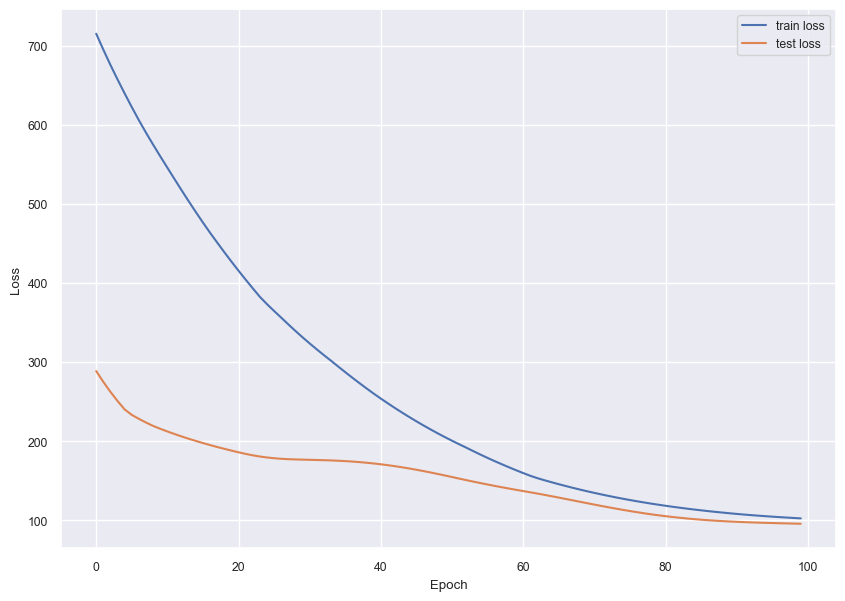

In [49]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
# 모델 평가
loss = model.evaluate(X_test, y_test, verbose=0)[0]
mse = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'loss: {loss}, mse: {mse}')

loss: 95.81177520751953, mse: 7.654150009155273


In [51]:
# 새로운 데이터의 Pulse 예측
new_data = np.array([[5, 162, 60, 191, 36]])
y_pred = model.predict(new_data)
print(y_pred)

1/1 [==============================] - 0s 217ms/step
[[61.3269]]
